In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

def load_and_preprocess_data():
    try:
        # Read main consumption data
        df_sheet1 = pd.read_csv('HO Unit Consumption - Sheet1.csv')
        print("Successfully loaded Sheet1")

        # Read feederwise consumption
        df_feeder = pd.read_csv('HO Unit Consumption - Consumption Feederwise.csv')
        print("Successfully loaded Feederwise data")

        # Clean and preprocess Sheet1
        # Remove any rows where all values are NaN
        df_sheet1 = df_sheet1.dropna(how='all')

        # Convert dates - using the correct column name with space
        df_sheet1['Date'] = pd.to_datetime(df_sheet1['Date '].astype(str).str.strip(), format='%d-%b-%Y')

        # Convert numeric columns
        numeric_columns = [
            'Hostel-O Voltage (V)',
            'Hostel-O Current (A)',
            'Hostel-O Main I/C Unit in MWH',
            'AC Feeder from 1st to 8th Floor'
        ]

        for col in numeric_columns:
            df_sheet1[col] = pd.to_numeric(df_sheet1[col], errors='coerce')

        # Clean and preprocess Feederwise data
        # Remove header rows (first 2 rows) and reset index
        df_feeder = df_feeder.iloc[2:].reset_index(drop=True)

        # Rename columns based on first row
        df_feeder.columns = ['S.No.', 'Date', 'Time & ', 'TR-1 KWH', 'TR-1 Volatage (V)',
                           'TR-1 Current (A)', 'AC Feeder from 1st to 8th Floor',
                           'AC Feeder Mess and Gnd', 'Total Unit', 'Unnamed: 9']

        # Convert dates
        df_feeder['Date'] = pd.to_datetime(df_feeder['Date'].astype(str).str.strip(), format='%d-%b-%Y')

        # Extract hour from Time column
        df_feeder['Hour'] = df_feeder['Time & '].str.extract('(\d+)').astype(float)

        # Convert numeric columns
        feeder_numeric_columns = [
            'TR-1 KWH',
            'TR-1 Volatage (V)',
            'TR-1 Current (A)',
            'AC Feeder from 1st to 8th Floor',
            'AC Feeder Mess and Gnd'
        ]

        for col in feeder_numeric_columns:
            df_feeder[col] = pd.to_numeric(df_feeder[col], errors='coerce')

        print("Successfully preprocessed data")
        return df_sheet1, df_feeder

    except Exception as e:
        print(f"Error in data processing: {str(e)}")
        print("\nDataFrame info:")
        if 'df_sheet1' in locals():
            print("\nSheet1 columns:", df_sheet1.columns.tolist())
        if 'df_feeder' in locals():
            print("\nFeeder columns:", df_feeder.columns.tolist())
        return None, None

def create_visualizations(df_sheet1, df_feeder):
    try:
        # 1. Daily Consumption Trend
        plt.figure(figsize=(15, 7))
        plt.plot(df_sheet1['Date'], df_sheet1['Hostel-O Main I/C Unit in MWH'],
                marker='o', linestyle='-', markersize=6)
        plt.title('Daily Electricity Consumption Trend', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Consumption (MWH)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('daily_consumption.png')
        plt.close()
        print("Generated daily consumption plot")

        # 2. Voltage vs Current Analysis
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(df_sheet1['Hostel-O Voltage (V)'], df_sheet1['Hostel-O Current (A)'], alpha=0.5)
        plt.title('Voltage vs Current Relationship')
        plt.xlabel('Voltage (V)')
        plt.ylabel('Current (A)')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(df_sheet1['Date'], df_sheet1['Hostel-O Current (A)'],
                label='Current', color='red')
        plt.title('Current Variation Over Time')
        plt.xlabel('Date')
        plt.ylabel('Current (A)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('voltage_current_analysis.png')
        plt.close()
        print("Generated voltage/current analysis plots")

        # 3. Hourly Consumption Pattern
        plt.figure(figsize=(12, 6))
        hourly_data = df_feeder.groupby('Hour')['TR-1 KWH'].mean()
        plt.bar(hourly_data.index, hourly_data.values)
        plt.title('Average Hourly Power Consumption')
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Consumption (KWH)')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('hourly_consumption.png')
        plt.close()
        print("Generated hourly consumption plot")

        # 4. Peak Load Analysis
        peak_hours = df_feeder.groupby('Hour')['TR-1 KWH'].mean().nlargest(5)
        plt.figure(figsize=(10, 6))
        peak_hours.plot(kind='bar')
        plt.title('Top 5 Peak Load Hours')
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Consumption (KWH)')
        plt.tight_layout()
        plt.savefig('peak_load_analysis.png')
        plt.close()
        print("Generated peak load analysis plot")

    except Exception as e:
        print(f"Error in creating visualizations: {str(e)}")
        import traceback
        print(traceback.format_exc())

def print_analysis_results(df_sheet1, df_feeder):
    try:
        # Print peak consumption times
        peak_hours = df_feeder.groupby('Hour')['TR-1 KWH'].mean().nlargest(3)
        print("\nPeak Consumption Hours:")
        for hour, consumption in peak_hours.items():
            print(f"Hour {int(hour)}:00 - Average consumption: {consumption:.2f} KWH")

        # Print overall statistics
        print("\nOverall Consumption Statistics:")
        print(f"Average Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].mean():.2f} MWH")
        print(f"Maximum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].max():.2f} MWH")
        print(f"Minimum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].min():.2f} MWH")

    except Exception as e:
        print(f"Error in printing analysis: {str(e)}")

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df_sheet1, df_feeder = load_and_preprocess_data()

    if df_sheet1 is None or df_feeder is None:
        print("Error: Could not process data")
        return

    # Create visualizations
    print("Generating visualizations...")
    create_visualizations(df_sheet1, df_feeder)

    # Print analysis results
    print_analysis_results(df_sheet1, df_feeder)

    print("\nAnalysis complete! Check the generated PNG files for visualizations.")

if __name__ == "__main__":
    main()

Loading and preprocessing data...
Successfully loaded Sheet1
Successfully loaded Feederwise data
Successfully preprocessed data
Generating visualizations...
Generated daily consumption plot
Generated voltage/current analysis plots
Generated hourly consumption plot
Generated peak load analysis plot

Peak Consumption Hours:
Hour 4:00 - Average consumption: 5710.00 KWH
Hour 2:00 - Average consumption: 5359.45 KWH
Hour 5:00 - Average consumption: 4493.33 KWH

Overall Consumption Statistics:
Average Daily Consumption: 2317.71 MWH
Maximum Daily Consumption: 3622.54 MWH
Minimum Daily Consumption: 712.73 MWH

Analysis complete! Check the generated PNG files for visualizations.


Loading and preprocessing data...
Successfully loaded Sheet1
Successfully loaded Feederwise data
Successfully preprocessed data

Generating and displaying visualizations...


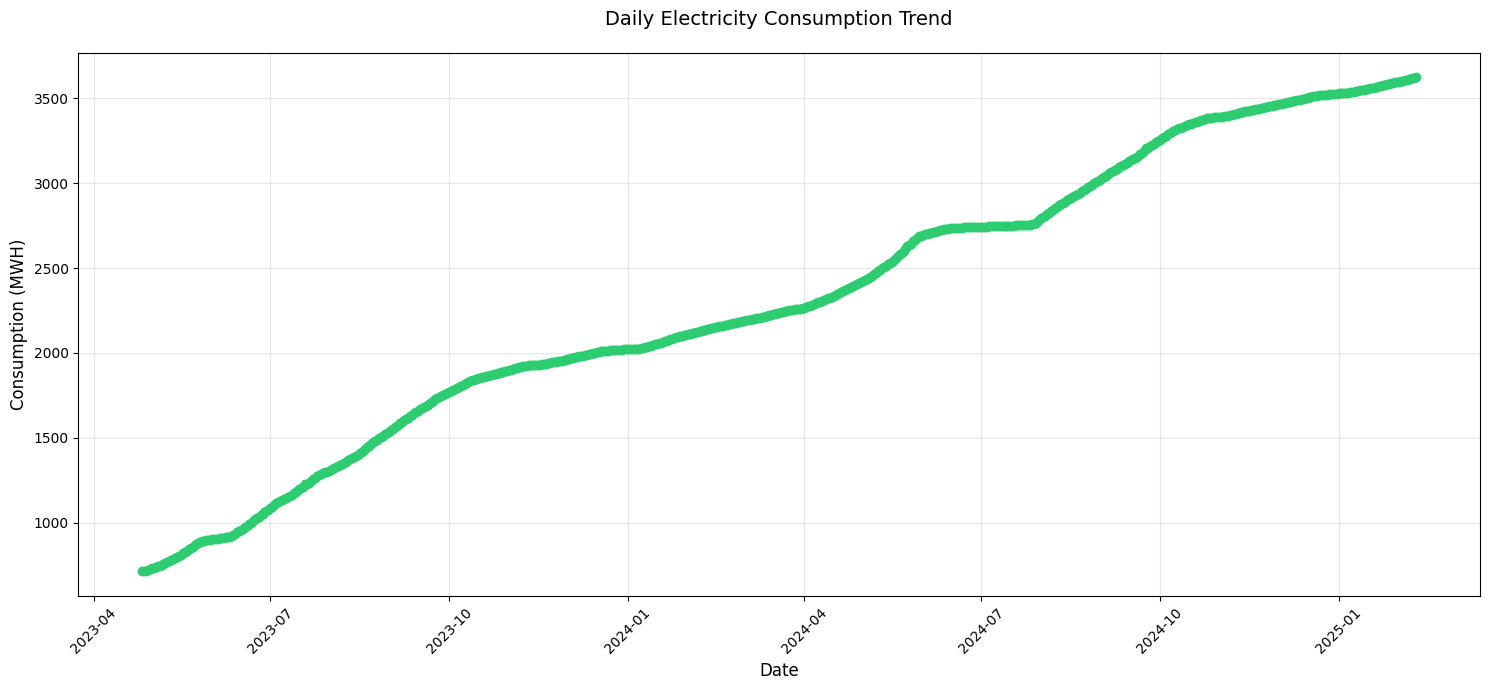

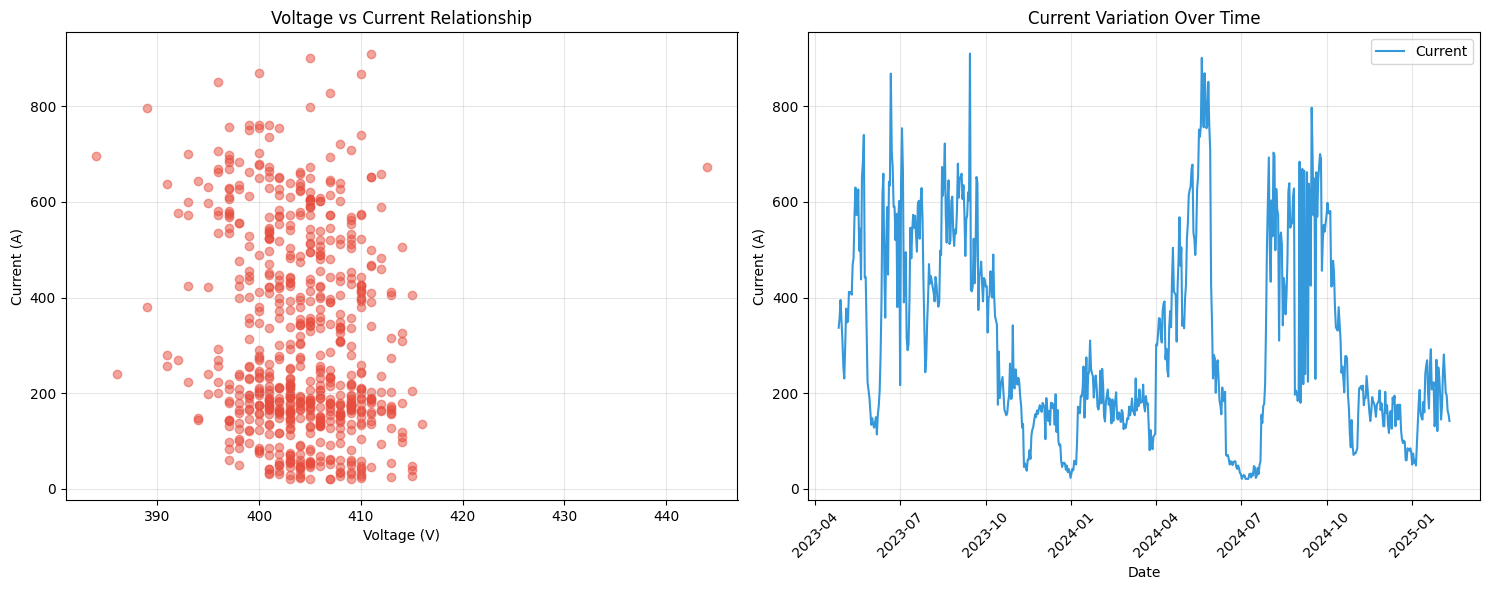

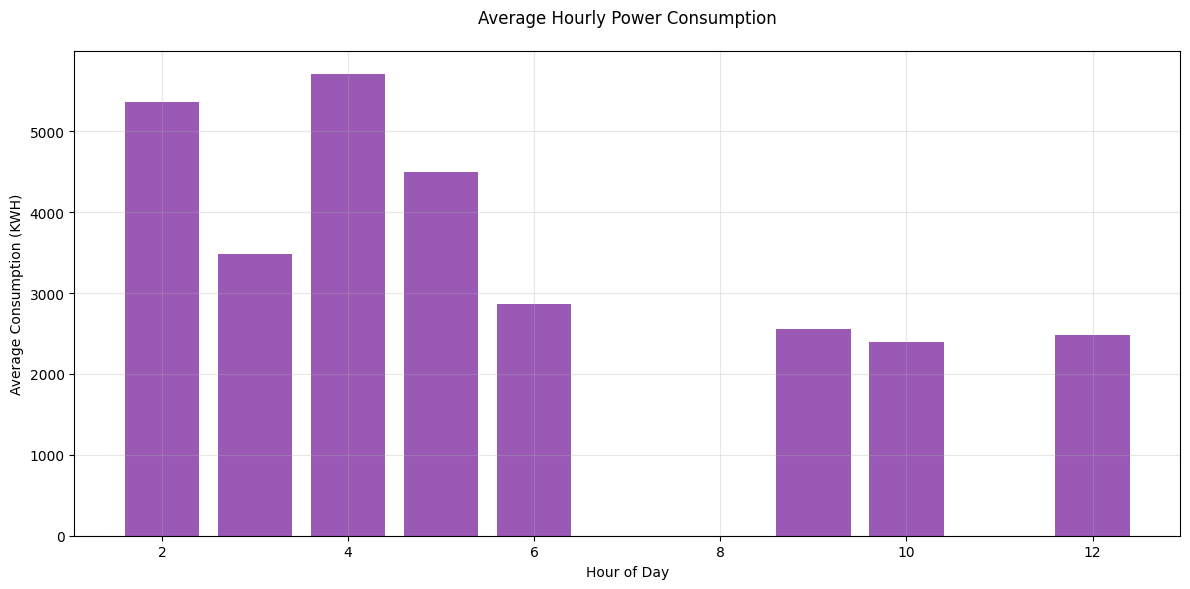

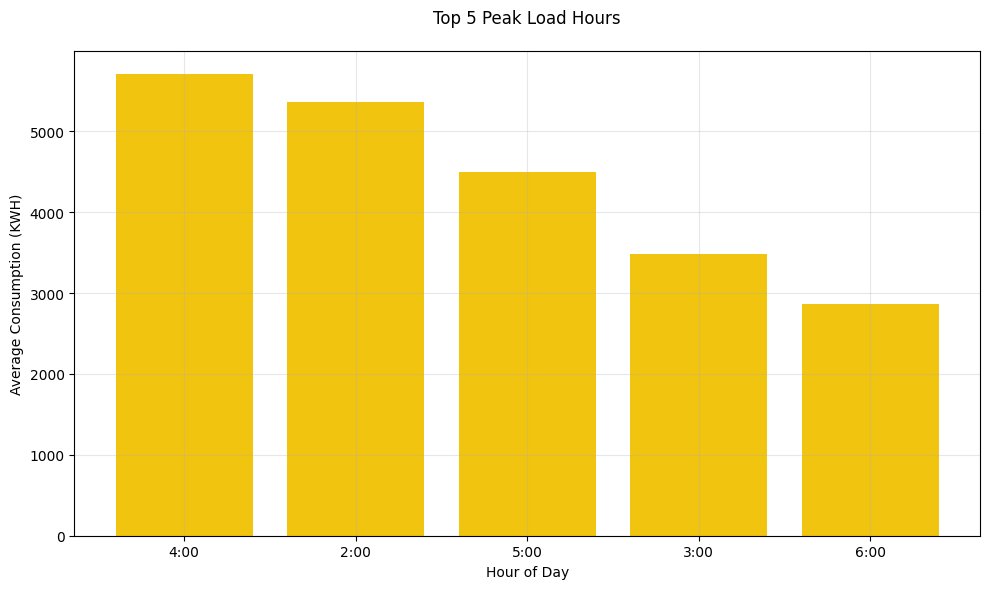


Peak Consumption Hours:
Hour 4:00 - Average consumption: 5710.00 KWH
Hour 2:00 - Average consumption: 5359.45 KWH
Hour 5:00 - Average consumption: 4493.33 KWH

Overall Consumption Statistics:
Average Daily Consumption: 2317.71 MWH
Maximum Daily Consumption: 3622.54 MWH
Minimum Daily Consumption: 712.73 MWH

Analysis complete!


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

def load_and_preprocess_data():
    try:
        # Read main consumption data
        df_sheet1 = pd.read_csv('HO Unit Consumption - Sheet1.csv')
        print("Successfully loaded Sheet1")

        # Read feederwise consumption
        df_feeder = pd.read_csv('HO Unit Consumption - Consumption Feederwise.csv')
        print("Successfully loaded Feederwise data")

        # Clean and preprocess Sheet1
        df_sheet1 = df_sheet1.dropna(how='all')
        df_sheet1['Date'] = pd.to_datetime(df_sheet1['Date '].astype(str).str.strip(), format='%d-%b-%Y')

        # Convert numeric columns in Sheet1
        numeric_columns = [
            'Hostel-O Voltage (V)',
            'Hostel-O Current (A)',
            'Hostel-O Main I/C Unit in MWH',
            'AC Feeder from 1st to 8th Floor'
        ]
        for col in numeric_columns:
            df_sheet1[col] = pd.to_numeric(df_sheet1[col], errors='coerce')

        # Clean and preprocess Feederwise data
        df_feeder = df_feeder.iloc[2:].reset_index(drop=True)
        df_feeder.columns = ['S.No.', 'Date', 'Time & ', 'TR-1 KWH', 'TR-1 Volatage (V)',
                           'TR-1 Current (A)', 'AC Feeder from 1st to 8th Floor',
                           'AC Feeder Mess and Gnd', 'Total Unit', 'Unnamed: 9']

        df_feeder['Date'] = pd.to_datetime(df_feeder['Date'].astype(str).str.strip(), format='%d-%b-%Y')
        df_feeder['Hour'] = df_feeder['Time & '].str.extract('(\d+)').astype(float)

        # Convert numeric columns in Feederwise
        feeder_numeric_columns = [
            'TR-1 KWH',
            'TR-1 Volatage (V)',
            'TR-1 Current (A)',
            'AC Feeder from 1st to 8th Floor',
            'AC Feeder Mess and Gnd'
        ]
        for col in feeder_numeric_columns:
            df_feeder[col] = pd.to_numeric(df_feeder[col], errors='coerce')

        print("Successfully preprocessed data")
        return df_sheet1, df_feeder

    except Exception as e:
        print(f"Error in data processing: {str(e)}")
        return None, None

def create_and_display_visualizations(df_sheet1, df_feeder):
    try:
        # Use default style instead of seaborn
        plt.style.use('default')

        # 1. Daily Consumption Trend
        plt.figure(figsize=(15, 7))
        plt.plot(df_sheet1['Date'], df_sheet1['Hostel-O Main I/C Unit in MWH'],
                marker='o', linestyle='-', markersize=6, color='#2ecc71')
        plt.title('Daily Electricity Consumption Trend', fontsize=14, pad=20)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Consumption (MWH)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('daily_consumption.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. Voltage vs Current Analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        ax1.scatter(df_sheet1['Hostel-O Voltage (V)'], df_sheet1['Hostel-O Current (A)'],
                   alpha=0.5, color='#e74c3c')
        ax1.set_title('Voltage vs Current Relationship')
        ax1.set_xlabel('Voltage (V)')
        ax1.set_ylabel('Current (A)')
        ax1.grid(True, alpha=0.3)

        ax2.plot(df_sheet1['Date'], df_sheet1['Hostel-O Current (A)'],
                color='#3498db', label='Current')
        ax2.set_title('Current Variation Over Time')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Current (A)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        plt.tight_layout()
        plt.savefig('voltage_current_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. Hourly Consumption Pattern
        plt.figure(figsize=(12, 6))
        hourly_data = df_feeder.groupby('Hour')['TR-1 KWH'].mean()
        plt.bar(hourly_data.index, hourly_data.values, color='#9b59b6')
        plt.title('Average Hourly Power Consumption', pad=20)
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Consumption (KWH)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('hourly_consumption.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 4. Peak Load Analysis
        plt.figure(figsize=(10, 6))
        peak_hours = df_feeder.groupby('Hour')['TR-1 KWH'].mean().nlargest(5)
        plt.bar(range(len(peak_hours)), peak_hours.values, color='#f1c40f')
        plt.xticks(range(len(peak_hours)), [f"{int(hour)}:00" for hour in peak_hours.index])
        plt.title('Top 5 Peak Load Hours', pad=20)
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Consumption (KWH)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('peak_load_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error in creating visualizations: {str(e)}")
        import traceback
        print(traceback.format_exc())

def print_analysis_results(df_sheet1, df_feeder):
    try:
        # Print peak consumption times
        peak_hours = df_feeder.groupby('Hour')['TR-1 KWH'].mean().nlargest(3)
        print("\nPeak Consumption Hours:")
        for hour, consumption in peak_hours.items():
            print(f"Hour {int(hour)}:00 - Average consumption: {consumption:.2f} KWH")

        # Print overall statistics
        print("\nOverall Consumption Statistics:")
        print(f"Average Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].mean():.2f} MWH")
        print(f"Maximum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].max():.2f} MWH")
        print(f"Minimum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].min():.2f} MWH")

    except Exception as e:
        print(f"Error in printing analysis: {str(e)}")

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df_sheet1, df_feeder = load_and_preprocess_data()

    if df_sheet1 is None or df_feeder is None:
        print("Error: Could not process data")
        return

    # Create and display visualizations
    print("\nGenerating and displaying visualizations...")
    create_and_display_visualizations(df_sheet1, df_feeder)

    # Print analysis results
    print_analysis_results(df_sheet1, df_feeder)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()

Loading and preprocessing data...
Successfully loaded Sheet1
Successfully loaded Feederwise data
Successfully preprocessed data

Generating and displaying visualizations...


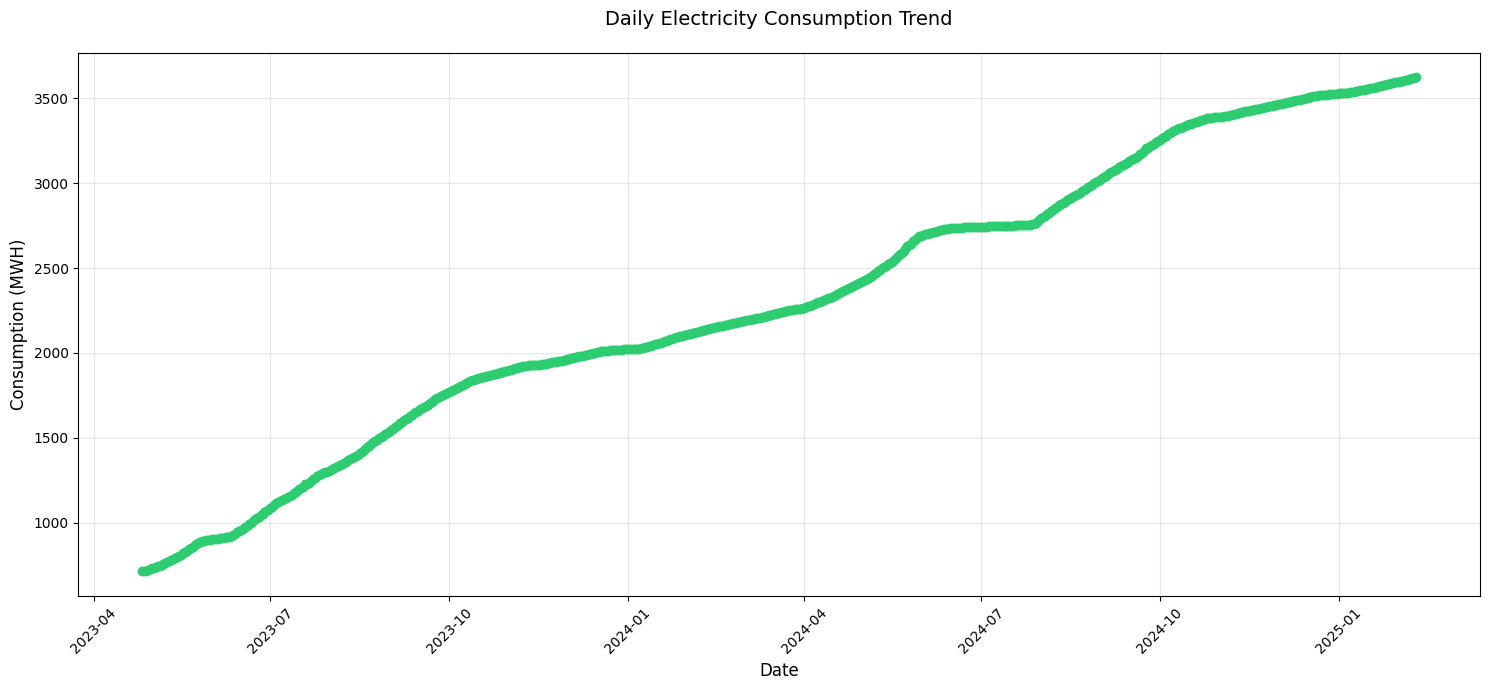

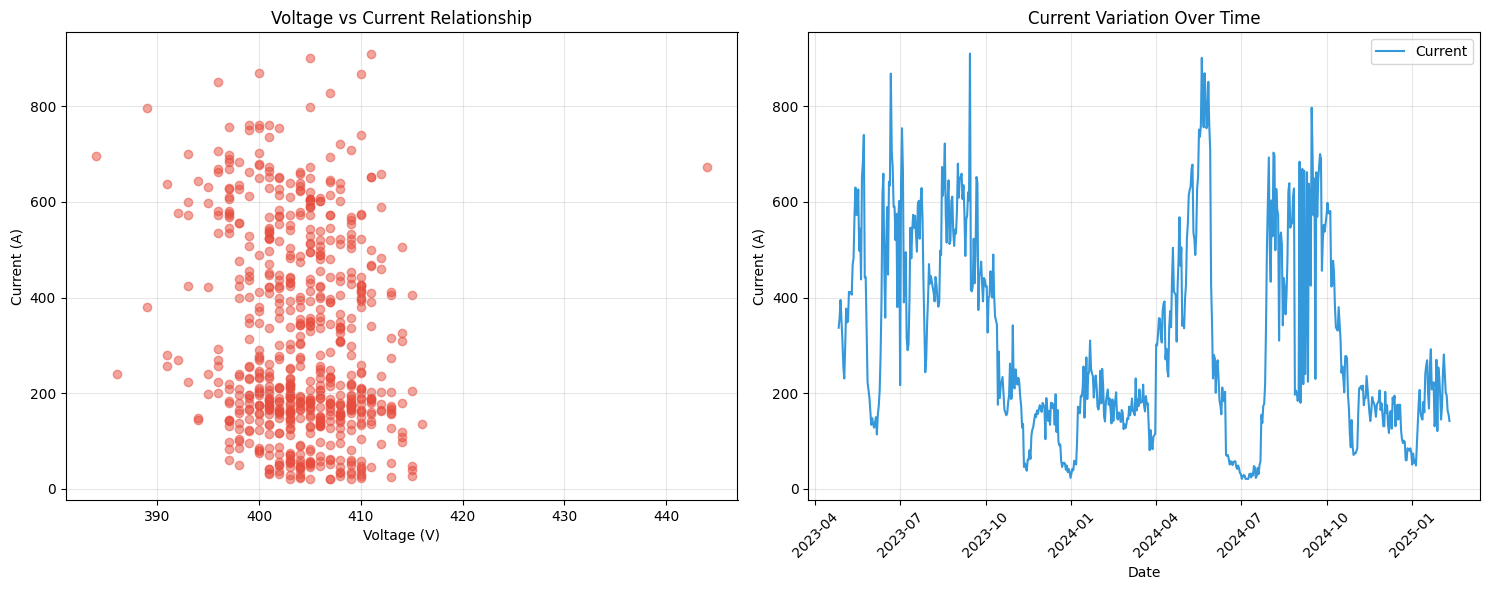

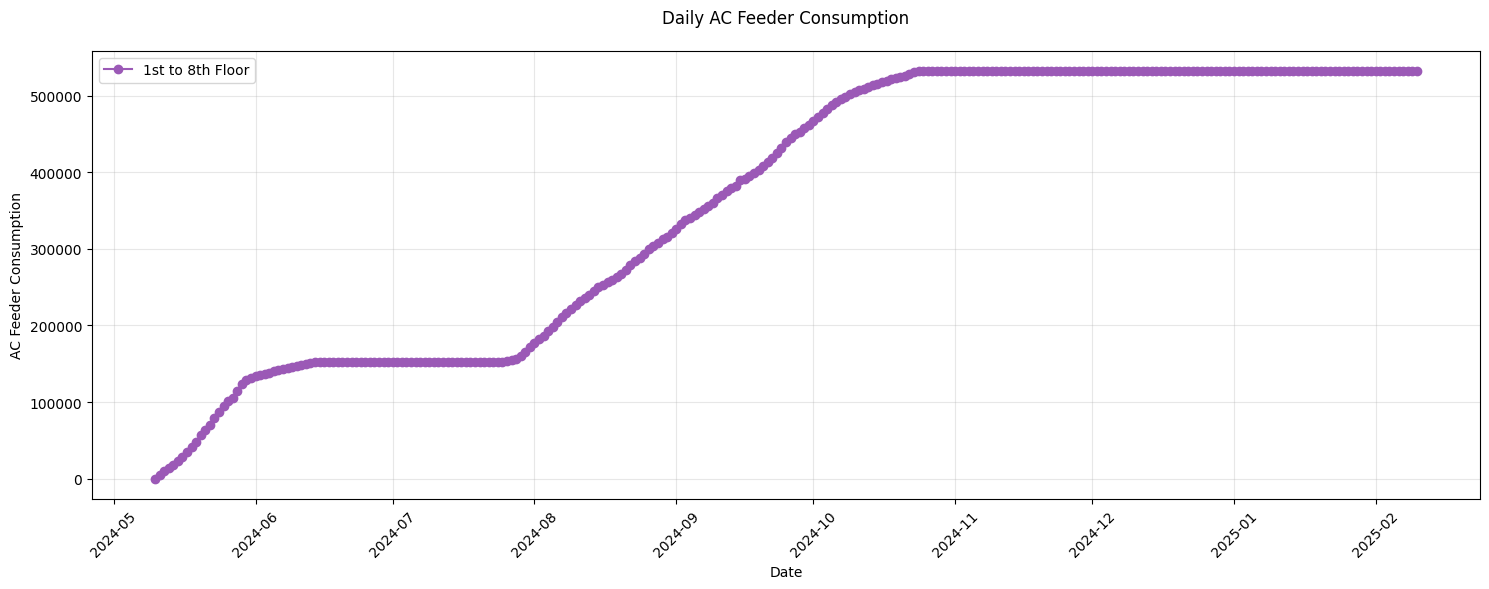

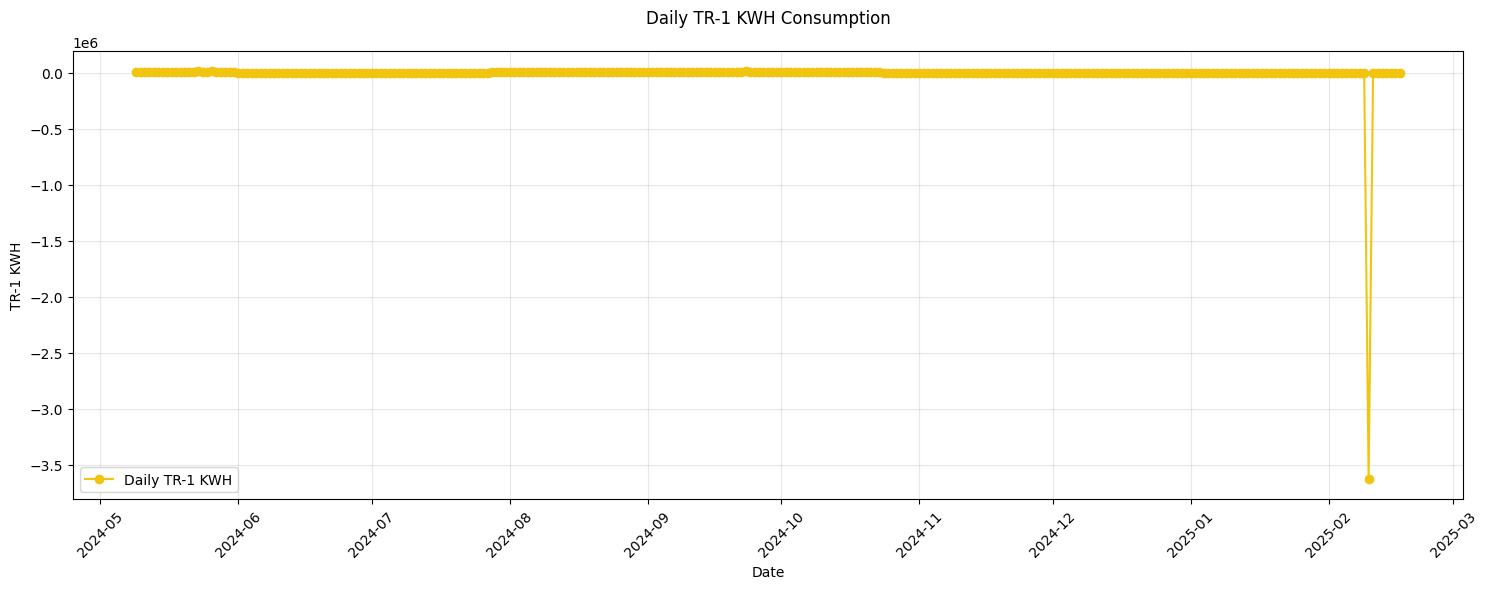


Daily Consumption Statistics:
--------------------------------------------------
Average Daily Consumption: 2317.71 MWH
Maximum Daily Consumption: 3622.54 MWH
Minimum Daily Consumption: 712.73 MWH

Day-to-Day Variation Analysis:
--------------------------------------------------
Average Daily Change: 4.44 MWH
Maximum Daily Increase: 15.61 MWH
Maximum Daily Decrease: 0.30 MWH

Voltage and Current Statistics:
--------------------------------------------------
Average Voltage: 404.22 V
Average Current: 308.57 A
Maximum Current: 910.00 A
Minimum Current: 21.00 A

AC Feeder Statistics:
--------------------------------------------------
Average AC Feeder Consumption: 361982.30
Maximum AC Feeder Consumption: 531971.00
Minimum AC Feeder Consumption: 0.00

Analysis complete!


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_and_preprocess_data():
    try:
        # Read main consumption data
        df_sheet1 = pd.read_csv('HO Unit Consumption - Sheet1.csv')
        print("Successfully loaded Sheet1")

        # Read feederwise consumption
        df_feeder = pd.read_csv('HO Unit Consumption - Consumption Feederwise.csv')
        print("Successfully loaded Feederwise data")

        # Clean and preprocess Sheet1
        df_sheet1 = df_sheet1.dropna(how='all')
        df_sheet1['Date'] = pd.to_datetime(df_sheet1['Date '].astype(str).str.strip(), format='%d-%b-%Y')

        # Convert numeric columns in Sheet1
        numeric_columns = [
            'Hostel-O Voltage (V)',
            'Hostel-O Current (A)',
            'Hostel-O Main I/C Unit in MWH',
            'AC Feeder from 1st to 8th Floor'
        ]
        for col in numeric_columns:
            df_sheet1[col] = pd.to_numeric(df_sheet1[col], errors='coerce')

        # Clean and preprocess Feederwise data
        df_feeder = df_feeder.iloc[2:].reset_index(drop=True)
        df_feeder.columns = ['S.No.', 'Date', 'Time & ', 'TR-1 KWH', 'TR-1 Volatage (V)',
                           'TR-1 Current (A)', 'AC Feeder from 1st to 8th Floor',
                           'AC Feeder Mess and Gnd', 'Total Unit', 'Unnamed: 9']

        df_feeder['Date'] = pd.to_datetime(df_feeder['Date'].astype(str).str.strip(), format='%d-%b-%Y')

        # Convert numeric columns in Feederwise
        feeder_numeric_columns = [
            'TR-1 KWH',
            'TR-1 Volatage (V)',
            'TR-1 Current (A)',
            'AC Feeder from 1st to 8th Floor',
            'AC Feeder Mess and Gnd'
        ]
        for col in feeder_numeric_columns:
            df_feeder[col] = pd.to_numeric(df_feeder[col], errors='coerce')

        print("Successfully preprocessed data")
        return df_sheet1, df_feeder

    except Exception as e:
        print(f"Error in data processing: {str(e)}")
        return None, None

def create_and_display_visualizations(df_sheet1, df_feeder):
    try:
        plt.style.use('default')

        # 1. Daily Consumption Trend
        plt.figure(figsize=(15, 7))
        plt.plot(df_sheet1['Date'], df_sheet1['Hostel-O Main I/C Unit in MWH'],
                marker='o', linestyle='-', markersize=6, color='#2ecc71')
        plt.title('Daily Electricity Consumption Trend', fontsize=14, pad=20)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Consumption (MWH)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('daily_consumption.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. Voltage vs Current Analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        ax1.scatter(df_sheet1['Hostel-O Voltage (V)'], df_sheet1['Hostel-O Current (A)'],
                   alpha=0.5, color='#e74c3c')
        ax1.set_title('Voltage vs Current Relationship')
        ax1.set_xlabel('Voltage (V)')
        ax1.set_ylabel('Current (A)')
        ax1.grid(True, alpha=0.3)

        ax2.plot(df_sheet1['Date'], df_sheet1['Hostel-O Current (A)'],
                color='#3498db', label='Current')
        ax2.set_title('Current Variation Over Time')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Current (A)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        plt.tight_layout()
        plt.savefig('voltage_current_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. Daily AC Feeder Consumption
        plt.figure(figsize=(15, 6))
        plt.plot(df_sheet1['Date'], df_sheet1['AC Feeder from 1st to 8th Floor'],
                marker='o', linestyle='-', color='#9b59b6', label='1st to 8th Floor')
        plt.title('Daily AC Feeder Consumption', pad=20)
        plt.xlabel('Date')
        plt.ylabel('AC Feeder Consumption')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('ac_feeder_consumption.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 4. Daily TR-1 KWH Analysis
        plt.figure(figsize=(15, 6))
        df_feeder_daily = df_feeder.groupby('Date')['TR-1 KWH'].mean()
        plt.plot(df_feeder_daily.index, df_feeder_daily.values,
                marker='o', color='#f1c40f', label='Daily TR-1 KWH')
        plt.title('Daily TR-1 KWH Consumption', pad=20)
        plt.xlabel('Date')
        plt.ylabel('TR-1 KWH')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('daily_tr1_consumption.png', dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error in creating visualizations: {str(e)}")
        import traceback
        print(traceback.format_exc())

def print_analysis_results(df_sheet1, df_feeder):
    try:
        # Daily statistics for main consumption
        print("\nDaily Consumption Statistics:")
        print("-" * 50)
        print(f"Average Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].mean():.2f} MWH")
        print(f"Maximum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].max():.2f} MWH")
        print(f"Minimum Daily Consumption: {df_sheet1['Hostel-O Main I/C Unit in MWH'].min():.2f} MWH")

        # Day-to-day variation analysis
        df_sheet1['Daily_Change'] = df_sheet1['Hostel-O Main I/C Unit in MWH'].diff()
        print(f"\nDay-to-Day Variation Analysis:")
        print("-" * 50)
        print(f"Average Daily Change: {df_sheet1['Daily_Change'].mean():.2f} MWH")
        print(f"Maximum Daily Increase: {df_sheet1['Daily_Change'].max():.2f} MWH")
        print(f"Maximum Daily Decrease: {df_sheet1['Daily_Change'].min():.2f} MWH")

        # Voltage and Current Statistics
        print(f"\nVoltage and Current Statistics:")
        print("-" * 50)
        print(f"Average Voltage: {df_sheet1['Hostel-O Voltage (V)'].mean():.2f} V")
        print(f"Average Current: {df_sheet1['Hostel-O Current (A)'].mean():.2f} A")
        print(f"Maximum Current: {df_sheet1['Hostel-O Current (A)'].max():.2f} A")
        print(f"Minimum Current: {df_sheet1['Hostel-O Current (A)'].min():.2f} A")

        # AC Feeder Statistics
        print(f"\nAC Feeder Statistics:")
        print("-" * 50)
        print(f"Average AC Feeder Consumption: {df_sheet1['AC Feeder from 1st to 8th Floor'].mean():.2f}")
        print(f"Maximum AC Feeder Consumption: {df_sheet1['AC Feeder from 1st to 8th Floor'].max():.2f}")
        print(f"Minimum AC Feeder Consumption: {df_sheet1['AC Feeder from 1st to 8th Floor'].min():.2f}")

    except Exception as e:
        print(f"Error in printing analysis: {str(e)}")

def main():
    # Load and preprocess data
    print("Loading and preprocessing data...")
    df_sheet1, df_feeder = load_and_preprocess_data()

    if df_sheet1 is None or df_feeder is None:
        print("Error: Could not process data")
        return

    # Create and display visualizations
    print("\nGenerating and displaying visualizations...")
    create_and_display_visualizations(df_sheet1, df_feeder)

    # Print analysis results
    print_analysis_results(df_sheet1, df_feeder)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()